## Shortening Evaluation

In [4]:
import os
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'
import sys         
sys.path.append('/home/pranisaa/working_dir/Text-Summarization')
from config import *
from score import  RougeScore, BertScore
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
params = model_params
def get_rouge(params, method, quantity, data, epoch):
    path = f"""../model/t5-small_{data}_{method}_{quantity}_{epoch}epochs/"""
    rougescore = RougeScore(model = params["MODEL"], dataset = data, EPOCH = epoch, path = path)
    rougescores = rougescore.getscore_ave()
    return rougescores

def get_bert(params, method, quantity, data, epoch):
    path = f"""../model/t5-small_{data}_{method}_{quantity}_{epoch}epochs/"""
    bertscore = BertScore(model = params["MODEL"], dataset = data, EPOCH = epoch, path = path)
    bertscores = bertscore.getscore()
    return bertscores

#### Fine-tuned for 50 epochs

In [7]:
bertscores_fulltext = get_bert(params, "full-text", 0, 'xsum', 50)
bertscores_head25 = get_bert(params, "head-only", 25, 'xsum', 50)
bertscores_head35 = get_bert(params, "head-only", 35, 'xsum', 50)
bertscores_head45 = get_bert(params, "head-only", 45, 'xsum', 50)
bertscores_tail25 = get_bert(params, "tail-only", 25, 'xsum', 50)
bertscores_tail35 = get_bert(params, "tail-only", 35, 'xsum', 50)
bertscores_tail45 = get_bert(params, "tail-only", 45, 'xsum', 50)
bertscores_headtail_02_25 = get_bert(params, "head+tail_ratio0.2", 25, 'xsum', 50)
bertscores_headtail_02_35 = get_bert(params, "head+tail_ratio0.2", 35, 'xsum', 50)
bertscores_headtail_02_45 = get_bert(params, "head+tail_ratio0.2", 45, 'xsum', 50)
bertscores_headtail_05_25 = get_bert(params, "head+tail_ratio0.5", 25, 'xsum', 50)
bertscores_headtail_05_35 = get_bert(params, "head+tail_ratio0.5", 35, 'xsum', 50)
bertscores_headtail_05_45 = get_bert(params, "head+tail_ratio0.5", 45, 'xsum', 50)
bertscores_luhn25 = get_bert(params, "luhn", 25, 'xsum', 50)
bertscores_luhn35 = get_bert(params, "luhn", 35, 'xsum', 50)
bertscores_luhn45 = get_bert(params, "luhn", 45, 'xsum', 50)
bertscores_textrank25 = get_bert(params, "textrank", 25, 'xsum', 50)
bertscores_textrank35 = get_bert(params, "textrank", 35, 'xsum', 50)
bertscores_textrank45 = get_bert(params, "textrank", 45, 'xsum', 50)
bertscores_lsa25 = get_bert(params, "lsa", 25, 'xsum', 50)
bertscores_lsa35 = get_bert(params, "lsa", 35, 'xsum', 50)
bertscores_lsa45 = get_bert(params, "lsa", 45, 'xsum', 50)
bertscores_stopwords_all = get_bert(params, "stopwords", "all", 'xsum', 50)
bertscores_stopwords_neg = get_bert(params, "stopwords", "neg", 'xsum', 50)
# bertscores_stopwords_neg_headtail_05_25 = get_bert(params, "stopwords_neg", 'head+tail_ratio0.5_25', 'xsum', 50)
# bertscores_stopwords_neg_headtail_05_35 = get_bert(params, "stopwords_neg", 'head+tail_ratio0.5_35', 'xsum', 50)
# bertscores_stopwords_neg_headtail_05_45 = get_bert(params, "stopwords_neg", 'head+tail_ratio0.5_45', 'xsum', 50)
# bertscores_stopwords_neg_headtail_02_25 = get_bert(params, "combo_stopwords_neg", 'head+tail_ratio0.2_25', 'xsum', 50)
# bertscores_stopwords_neg_headtail_02_35 = get_bert(params, "combo_stopwords_neg", 'head+tail_ratio0.2_35', 'xsum', 50)
# bertscores_stopwords_neg_headtail_02_45 = get_bert(params, "combo_stopwords_neg", 'head+tail_ratio0.2_45', 'xsum', 50)
# bertscores_stopwords_neg_textrank_25 = get_bert(params, "combo_stopwords_neg", 'textrank_25', 'xsum', 50)
# bertscores_stopwords_neg_textrank_35 = get_bert(params, "combo_stopwords_neg", 'textrank_35', 'xsum', 50)
# bertscores_stopwords_neg_textrank_45 = get_bert(params, "combo_stopwords_neg", 'textrank_45', 'xsum', 50)
# bertscores_stopwords_neg_luhn_25 = get_bert(params, "combo_stopwords_neg", 'luhn_25', 'xsum', 50)
# bertscores_stopwords_neg_luhn_35 = get_bert(params, "combo_stopwords_neg", 'luhn_35', 'xsum', 50)
# bertscores_stopwords_neg_luhn_45 = get_bert(params, "combo_stopwords_neg", 'luhn_45', 'xsum', 50)
# bertscores_stopwords_all_textrank_25 = get_bert(params, "combo_stopwords_all", 'textrank_25', 'xsum', 50)
# bertscores_stopwords_all_textrank_35 = get_bert(params, "combo_stopwords_all", 'textrank_35', 'xsum', 50)
# bertscores_stopwords_all_textrank_45 = get_bert(params, "combo_stopwords_all", 'textrank_45', 'xsum', 50)
# bertscores_stopwords_all_luhn_25 = get_bert(params, "combo_stopwords_all", 'luhn_25', 'xsum', 50)
# bertscores_stopwords_all_luhn_35 = get_bert(params, "combo_stopwords_all", 'luhn_35', 'xsum', 50)
# bertscores_stopwords_all_luhn_45 = get_bert(params, "combo_stopwords_all", 'luhn_45', 'xsum', 50)

#### Compare All Strategies Rouge Scores

In [22]:
bert_head_onlys = {"plots": [bertscores_fulltext, bertscores_head25, bertscores_head35, bertscores_head45], "labels" : ['full-text', 'head-only_25', 'head-only_35', 'head-only_45']}
bert_tail_onlys = {"plots": [bertscores_fulltext, bertscores_tail25, bertscores_tail35, bertscores_tail45], "labels" : ['full-text', 'tail-only_25', 'tail-only_35', 'tail-only_45']}
bert_headtail_r02s = {"plots": [bertscores_fulltext, bertscores_headtail_02_25, bertscores_headtail_02_35, bertscores_headtail_02_45], "labels" : ['full-text', 'head+tail_r0.2_25', 'head+tail_r0.2_35', 'head+tail_r0.2_45']}
bert_headtail_r05s = {"plots": [bertscores_fulltext, bertscores_headtail_05_25, bertscores_headtail_05_35, bertscores_headtail_05_45], "labels" : ['full-text', 'head+tail_r0.5_25', 'head+tail_r0.5_35', 'head+tail_r0.5_45']}
bert_luhns = {"plots": [bertscores_fulltext, bertscores_luhn25, bertscores_luhn35, bertscores_luhn45], "labels" : ['full-text', 'luhn_25', 'luhn_35', 'luhn_45']}
bert_textranks = {"plots": [bertscores_fulltext, bertscores_textrank25, bertscores_textrank35, bertscores_textrank45], "labels" : ['full-text', 'textrank25', 'textrank35', "textrank45"]}
bert_lsas = {"plots": [bertscores_fulltext, bertscores_lsa25, bertscores_lsa35, bertscores_lsa45], "labels" : ['full-text', 'lsa25', 'lsa35',"lsa45" ]}
bert_stopwords = {"plots": [bertscores_fulltext, bertscores_stopwords_all, bertscores_stopwords_neg], "labels" : ['full-text', 'stopwords_all', 'stopwords_neg', ]}
# bert_stopwords_neg_headtail_r05s = {"plots": [bertscores_fulltext, bertscores_stopwords_neg_headtail_05_25,bertscores_stopwords_neg_headtail_05_35, bertscores_stopwords_neg_headtail_05_45], \
#                                  "labels": ['full-text', 'stopwords_neg_headtailr05_25', 'stopwords_neg_headtailr05_35', 'stopwords_neg_headtailr05_45' ]}
# bert_stopwords_neg_headtail_r02s = {"plots": [bertscores_fulltext, bertscores_stopwords_neg_headtail_02_25,bertscores_stopwords_neg_headtail_02_35, bertscores_stopwords_neg_headtail_05_45], \
#                                  "labels": ['full-text', 'stopwords_neg_headtailr02_25', 'stopwords_neg_headtailr02_35', 'stopwords_neg_headtailr05_45' ]}
# bert_stopwords_neg_textranks = {"plots": [bertscores_fulltext, bertscores_stopwords_neg_textrank_25,bertscores_stopwords_neg_textrank_35, bertscores_stopwords_neg_textrank_45], \
#                                  "labels": ['full-text', 'stopwords_neg_textrank_25', 'stopwords_neg_textrank_35', 'stopwords_neg_textrank_45' ]}
# bert_stopwords_neg_luhns = {"plots": [bertscores_fulltext, bertscores_stopwords_neg_luhn_25,bertscores_stopwords_neg_luhn_35, rbertscores_stopwords_neg_luhn_45], \
#                                  "labels": ['full-text', 'stopwords_neg_luhn_25', 'stopwords_neg_luhn_35', 'stopwords_neg_luhn_45' ]}
# bert_stopwords_all_textranks = {"plots": [bertscores_fulltext, bertscores_stopwords_all_textrank_25,bertscores_stopwords_all_textrank_35, bertscores_stopwords_all_textrank_45], \
#                                  "labels": ['full-text', 'stopwords_all_textrank_25', 'stopwords_all_textrank_35', 'stopwords_all_textrank_45' ]}
# bert_stopwords_all_luhns = {"plots": [bertscores_fulltext, bertscores_stopwords_all_luhn_25,bertscores_stopwords_all_luhn_35, bertscores_stopwords_all_luhn_45], \
#                                  "labels": ['full-text', 'stopwords_all_luhn_25', 'stopwords_all_luhn_35', 'stopwords_all_luhn_45' ]}

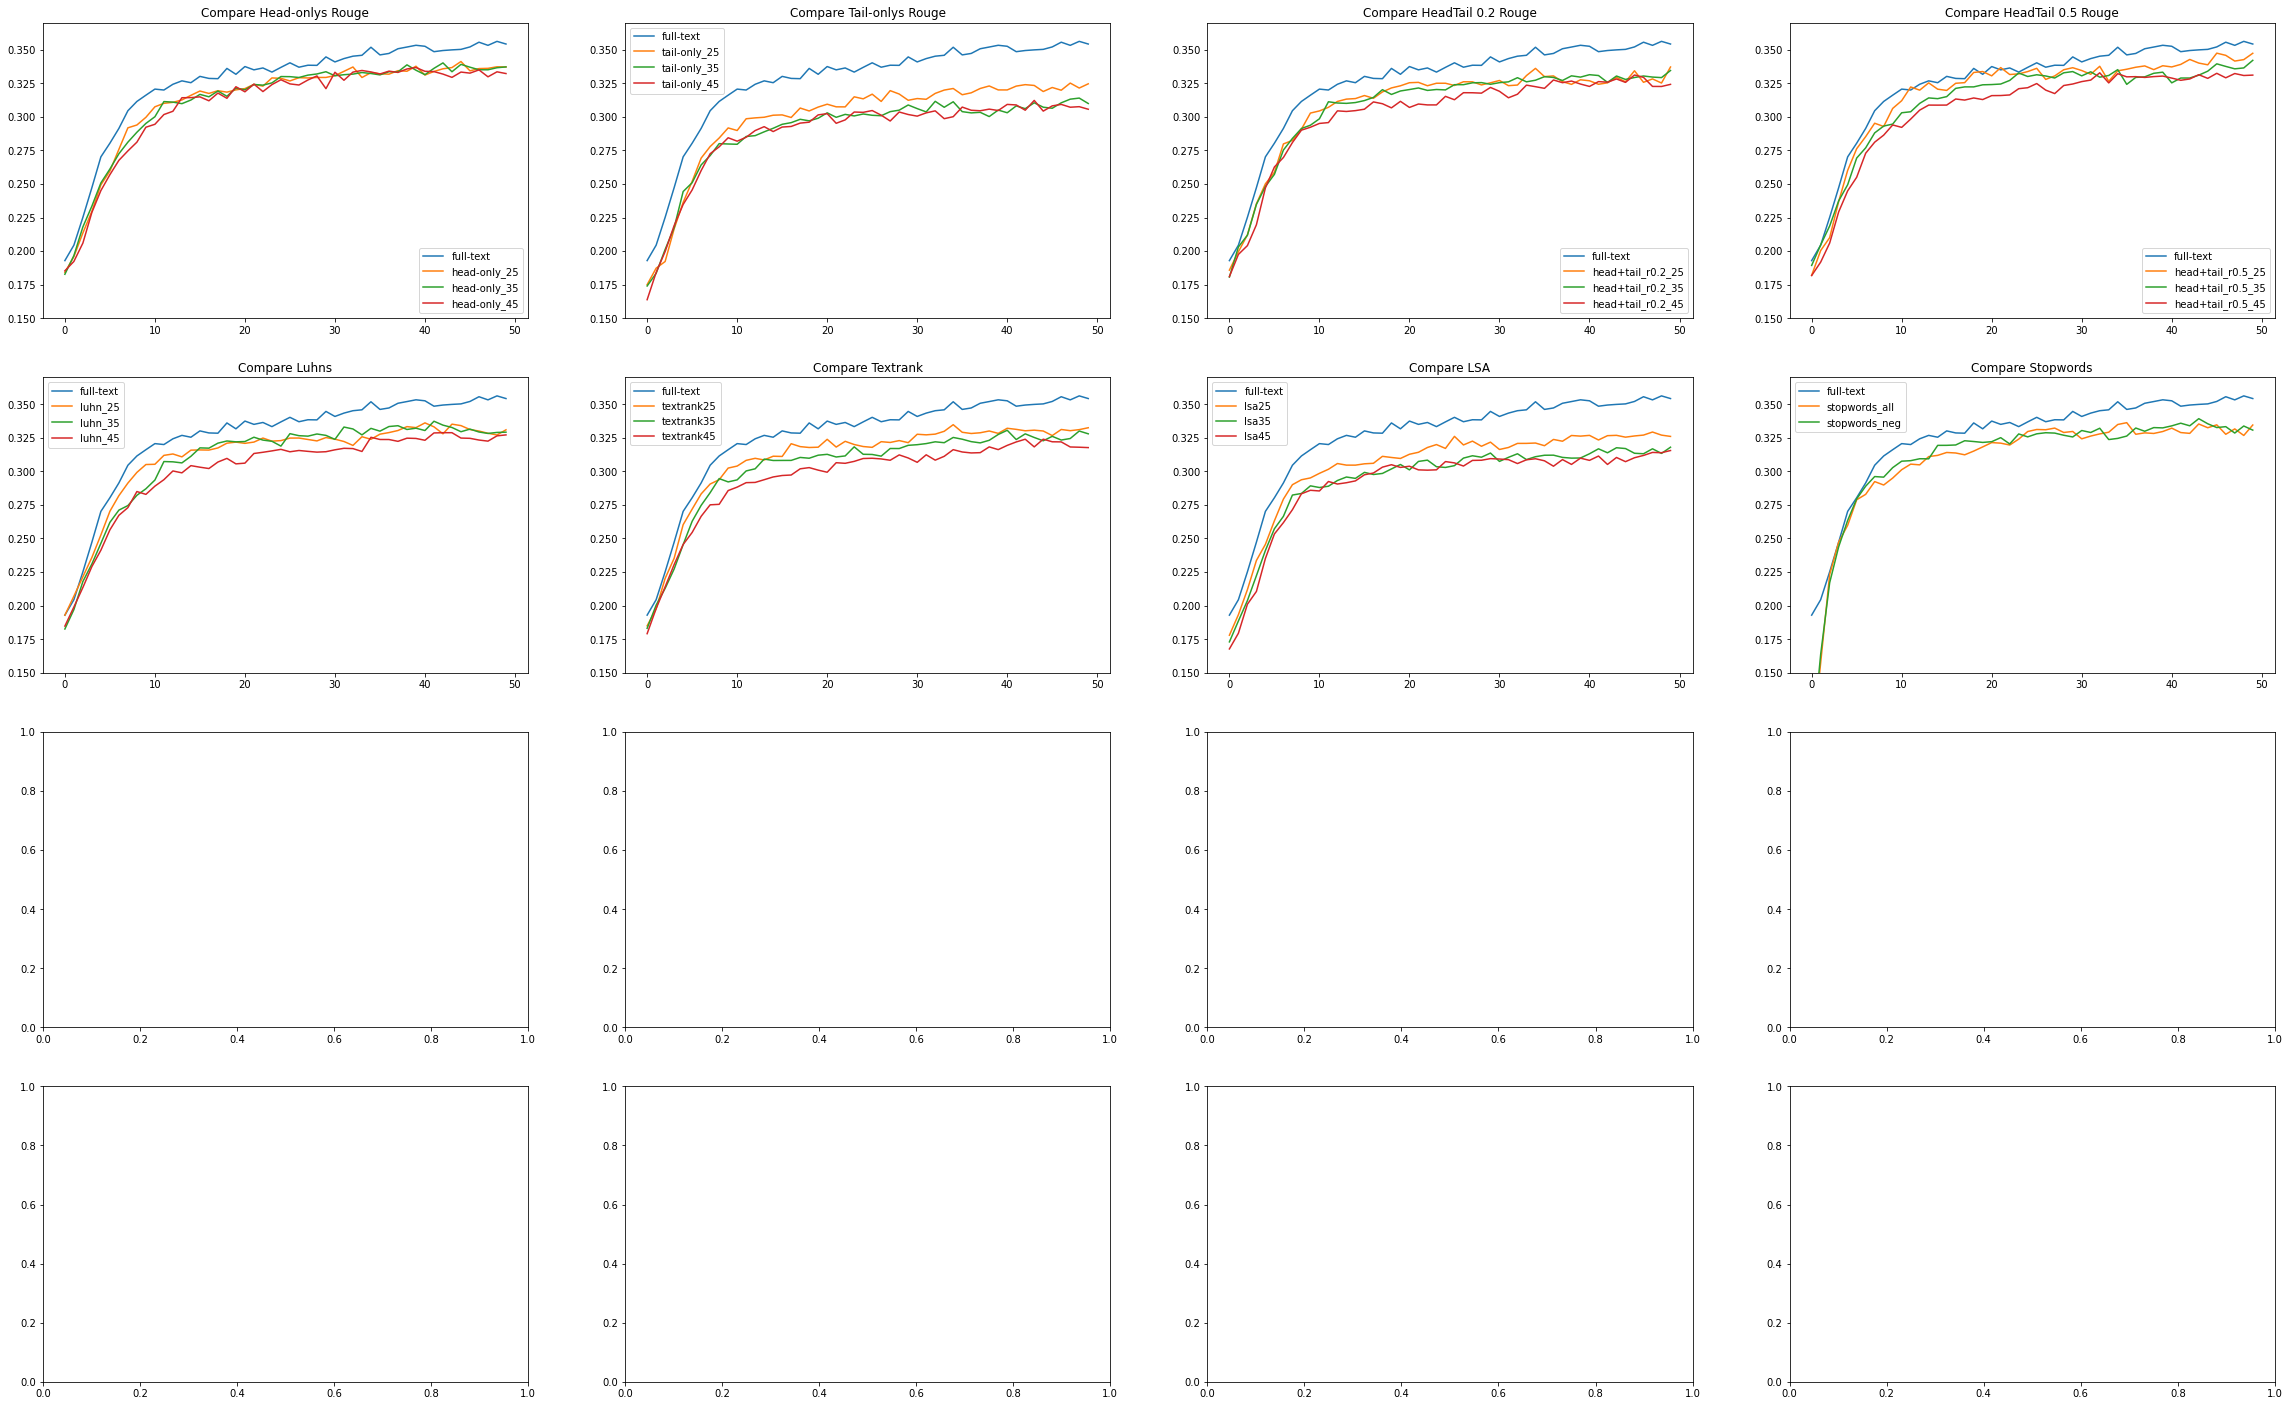

In [23]:
# rougescores_lsa45, "lsa45"
fig, axs = plt.subplots(4, 4, figsize=(40,25))
for i, plot in enumerate(bert_head_onlys["plots"]):
    axs[0, 0].plot(plot['f1'], label = bert_head_onlys["labels"][i])
    axs[0, 0].set_title("Compare Head-onlys Rouge")
    axs[0, 0].set_ylim([0.15, 0.37])
    axs[0, 0].legend()
for i, plot in enumerate(bert_tail_onlys["plots"]):
    axs[0, 1].plot(plot['f1'], label = bert_tail_onlys["labels"][i])
    axs[0, 1].set_title("Compare Tail-onlys Rouge")
    axs[0, 1].set_ylim([0.15, 0.37])
    axs[0, 1].legend()
for i, plot in enumerate(bert_headtail_r02s["plots"]):
    axs[0, 2].plot(plot['f1'], label = bert_headtail_r02s["labels"][i])
    axs[0, 2].set_title("Compare HeadTail 0.2 Rouge")
    axs[0, 2].set_ylim([0.15, 0.37])
    axs[0, 2].legend()
for i, plot in enumerate(bert_headtail_r05s["plots"]):
    axs[0, 3].plot(plot['f1'], label = bert_headtail_r05s["labels"][i])
    axs[0, 3].set_title("Compare HeadTail 0.5 Rouge")
    axs[0, 3].set_ylim([0.15, 0.37])
    axs[0, 3].legend()
for i, plot in enumerate(bert_luhns["plots"]):
    axs[1, 0].plot(plot['f1'], label = bert_luhns["labels"][i])
    axs[1, 0].set_title("Compare Luhns")
    axs[1, 0].set_ylim([0.15, 0.37])
    axs[1, 0].legend()
for i, plot in enumerate(bert_textranks["plots"]):
    axs[1, 1].plot(plot['f1'], label = bert_textranks["labels"][i])
    axs[1, 1].set_title("Compare Textrank")
    axs[1, 1].set_ylim([0.15, 0.37])
    axs[1, 1].legend()
for i, plot in enumerate(bert_lsas["plots"]):
    axs[1, 2].plot(plot['f1'], label = bert_lsas["labels"][i])
    axs[1, 2].set_title("Compare LSA")
    axs[1, 2].set_ylim([0.15, 0.37])
    axs[1, 2].legend()
for i, plot in enumerate(bert_stopwords["plots"]):
    axs[1, 3].plot(plot['f1'], label = bert_stopwords["labels"][i])
    axs[1, 3].set_title("Compare Stopwords")
    axs[1, 3].set_ylim([0.15, 0.37])
    axs[1, 3].legend()
# for i, plot in enumerate(bert_stopwords_neg_headtail_r05s["plots"]):
#     axs[2, 0].plot(plot['f1'], label = bert_stopwords_neg_headtail_r05s["labels"][i])
#     axs[2, 0].set_title("Compare Stopwords Neg Headtail 0.5 Rouge")
#     axs[2, 0].set_ylim([0.15, 0.37])
#     axs[2, 0].legend()
# for i, plot in enumerate(bert_stopwords_neg_headtail_r02s["plots"]):
#     axs[2, 1].plot(plot['f1'], label = bert_stopwords_neg_headtail_r02s["labels"][i])
#     axs[2, 1].set_ylim([0.15, 0.37])set_title("Compare Stopwords Neg Headtail 0.2 Rouge")
#     axs[2, 1].set_ylim([0.15, 0.37])
#     axs[2, 1].legend()
# for i, plot in enumerate(bert_stopwords_neg_textranks["plots"]):
#     axs[3, 0].plot(plot['f1'], label = bert_stopwords_neg_textranks["labels"][i])
#     axs[3, 0].set_title("Compare Stopwords Neg Textrank Rouge")
#     axs[3, 0].set_ylim([0.15, 0.37])
#     axs[3, 0].legend()
# for i, plot in enumerate(bert_stopwords_neg_luhns["plots"]):
#     axs[3, 1].plot(plot['f1'], label = bert_stopwords_neg_luhns["labels"][i])
#     axs[3, 1].set_title("Compare Stopwords Neg Luhn Rouge")
#     axs[3, 1].set_ylim([0.15, 0.37])
#     axs[3, 1].legend()
# for i, plot in enumerate(bert_stopwords_all_textranks["plots"]):
#     axs[3, 2].plot(plot['f1'], label = bert_stopwords_all_textranks["labels"][i])
#     axs[3, 2].set_title("Compare Stopwords All Textrank Rouge")
#     axs[3, 2].set_ylim([0.15, 0.37])
#     axs[3, 2].legend()
# for i, plot in enumerate(bert_stopwords_all_luhns["plots"]):
#     axs[3, 3].plot(plot['f1'], label = bert_stopwords_all_luhns["labels"][i])
#     axs[3, 3].set_title("Compare Stopwords All Luhn Rouge")
#     axs[3, 3].set_ylim([0.15, 0.37])
#     axs[3, 3].legend()
# # axs[1, 1].scatter(x, y)

#### Compare All Strategies BERT Scores

In [181]:
# bertscores_fulltext

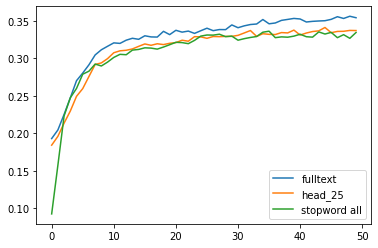

In [185]:
plt.plot(bertscores_fulltext['f1'], label ="fulltext")
plt.plot(bertscores_head25['f1'], label ="head_25")
plt.plot(bertscores_stopwords_all['f1'], label ="stopword all")
plt.legend()

#### Compare Strategies of Each Quantity

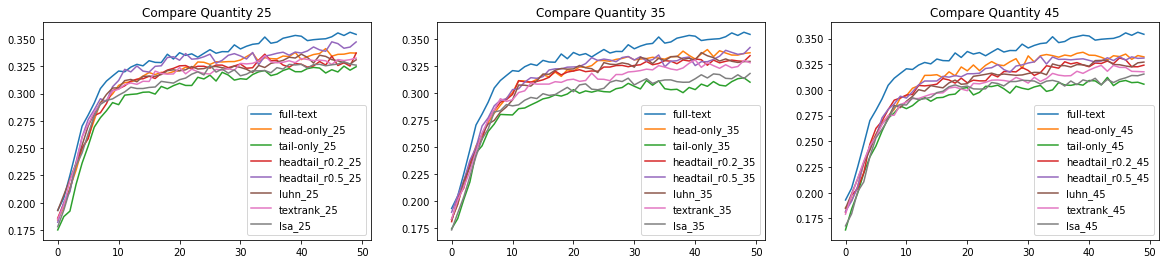

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(20,4))
quantity_25 = {"plots": [bertscores_fulltext, bertscores_head25, bertscores_tail25, 
                         bertscores_headtail_02_25, bertscores_headtail_05_25, 
                         bertscores_luhn25, bertscores_textrank25, bertscores_lsa25,],
#                          bertscores_stopwords_neg_headtail_05_25,
#                          bertscores_stopwords_neg_headtail_02_25,
#                          bertscores_stopwords_neg_textrank_25], 
               "labels" : ['full-text', 'head-only_25', 'tail-only_25', 'headtail_r0.2_25', 
                           'headtail_r0.5_25', 'luhn_25', 'textrank_25', 'lsa_25', ],}
#                            'stopword_headtail_r50_25', 'stopword_headtail_r20_25',
#                            'stopword_textrank_25'],}
#               "linestyles": ['solid', 'solid','solid','solid','solid','dashed','dashed','dashed', 'solid', 'solid', 'solid']}
quantity_35 = {"plots": [bertscores_fulltext, bertscores_head35, bertscores_tail35, 
                         bertscores_headtail_02_35, bertscores_headtail_05_35, 
                         bertscores_luhn35, bertscores_textrank35, bertscores_lsa35,],
#                          bertscores_stopwords_neg_headtail_05_35,
#                          bertscores_stopwords_neg_headtail_02_35,
#                          bertscores_stopwords_neg_textrank_35], 
               "labels" : ['full-text', 'head-only_35', 'tail-only_35', 'headtail_r0.2_35', 
                           'headtail_r0.5_35', 'luhn_35', 'textrank_35',  'lsa_35',]}
#                            'stopword_headtail_r50_35', 
#                            'stopword_headtail_r20_35',
#                            'stopword_textrank_35']}
quantity_45 = {"plots": [bertscores_fulltext, bertscores_head45, bertscores_tail45, 
                         bertscores_headtail_02_45, bertscores_headtail_05_45, 
                         bertscores_luhn45, bertscores_textrank45, bertscores_lsa45,],
#                          bertscores_stopwords_neg_headtail_05_45,
#                          bertscores_stopwords_neg_headtail_02_45,
#                         bertscores_stopwords_neg_textrank_45], 
               "labels" : ['full-text', 'head-only_45', 'tail-only_45', 'headtail_r0.2_45', 
                           'headtail_r0.5_45', 'luhn_45', 'textrank_45', 'lsa_45', ]}
#                            'stopword_headtail_r50_45',
#                            'stopword_headtail_r20_45',
#                           'stopword_textrank_45']}

for i, plot in enumerate(quantity_25["plots"]):
    axs[0].plot(plot['f1'], label = quantity_25["labels"][i]) #, linestyle = quantity_25["linestyles"][i])
    axs[0].set_title("Compare Quantity 25")
    axs[0].legend()
for i, plot in enumerate(quantity_35["plots"]):
    axs[1].plot(plot['f1'], label = quantity_35["labels"][i])
    axs[1].set_title("Compare Quantity 35")
    axs[1].legend()
for i, plot in enumerate(quantity_45["plots"]):
    axs[2].plot(plot['f1'], label = quantity_45["labels"][i])
    axs[2].set_title("Compare Quantity 45")
    axs[2].legend()

/tmp/ipykernel_67917/850137207.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(quantity_25_lables, rotation=25)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_67917/850137207.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(quantity_35_lables, rotation=25)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_67917/850137207.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 2].set_xticklabels(quantity_45_lables, rotation=25)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0, 3, '0.354'),
 Text(0, 3, '0.332'),
 Text(0, 3, '0.306'),
 Text(0, 3, '0.324'),
 Text(0, 3, '0.331'),
 Text(0, 3, '0.327'),
 Text(0, 3, '0.318'),
 Text(0, 3, '0.315')]

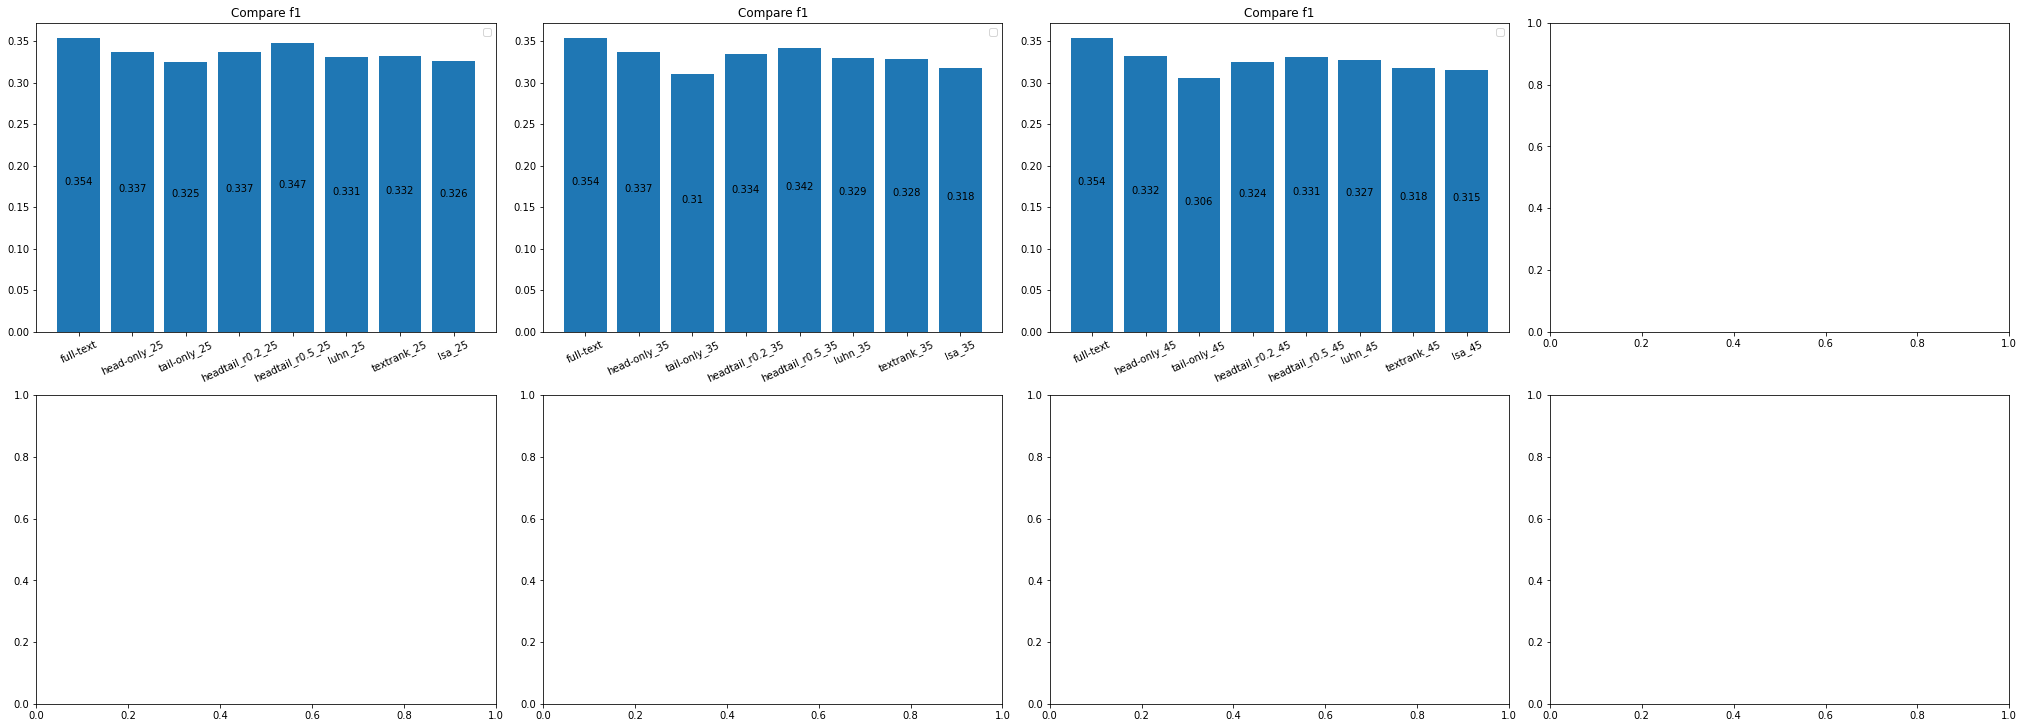

In [28]:
fig, axs = plt.subplots(2, 4, figsize=(28, 10), constrained_layout = True)

def prep_barplot(quantity, score = 'rouge1'):
    scores = [ q[score][-1] for q in quantity['plots']]
    lables = [ l for l in quantity['labels']]
    return scores, lables

quantity_25_scores, quantity_25_lables = prep_barplot(quantity_25, 'f1')
ax00 = axs[0, 0].bar(quantity_25_lables, quantity_25_scores)
axs[0, 0].set_xticklabels(quantity_25_lables, rotation=25)
axs[0, 0].set_title("Compare f1")
axs[0, 0].legend()
axs[0, 0].bar_label(ax00, padding=3, label_type= 'center', fmt ='%.3g')

quantity_35_scores, quantity_35_lables = prep_barplot(quantity_35, 'f1')
ax01 = axs[0, 1].bar(quantity_35_lables, quantity_35_scores)
axs[0, 1].set_xticklabels(quantity_35_lables, rotation=25)
axs[0, 1].set_title("Compare f1")
axs[0, 1].legend()
axs[0, 1].bar_label(ax01, padding=3, label_type= 'center', fmt ='%.3g')

quantity_45_scores, quantity_45_lables = prep_barplot(quantity_45, 'f1')
ax02 = axs[0, 2].bar(quantity_45_lables, quantity_45_scores)
axs[0, 2].set_xticklabels(quantity_45_lables, rotation=25)
axs[0, 2].set_title("Compare f1")
axs[0, 2].legend()
axs[0, 2].bar_label(ax02, padding=3, label_type= 'center', fmt ='%.3g')

In [29]:
# EPOCH = 30
# model = 't5-small'
# path = f"""../model/{model_params["MODEL"]}_{data}_full-text/"""
# def dev(n):
#     scores = []
#     for epoch in range(EPOCH):
#         path_df = os.path.join(path, f"result_eval/predictions_{model}_epoch{epoch}.csv")
#         df = pd.read_csv(path_df)
#         _id = df['Sample ids'][n]
#         scores.append(df['RougeScore1'][df['Sample ids']==_id])
#     return scores

# fig = plt.figure(figsize=(25, 20))
# fig.subplots_adjust(hspace=0.8, wspace=0.8)

# for n in range(0,100):
#     ax = fig.add_subplot(10, 10, n + 1)
#     scores = dev(n)
#     ax.plot(scores)
#     ax.text(30, 35, str(np.round(np.mean(scores),2)),
#          fontsize=14, weight = 'medium', ha='right', va = 'bottom')
#     ax.set_ylim([0,50])  

In [5]:
config = dict(
    model = "t5-small",
    data = "xsum",
    batch_size=16,
    train_epochs = 90,
    val_epochs = 1,
    learning_rate = 2e-05, # learning rate default betas=(0.9, 0.999), eps=1e-08
    scheduler = "linear",
    orig_source_length = 512,
    max_source_length = 512,
    max_target_length = 36,
    seed = 42,
    method = "stopwords",
    path = "preprocess/preprocessed_text/stopwords/quantity_all/",
    restriction = True,
    resume_from_checkpoint = True,)
config['output_path'] = config["orig_source_length"]

In [2]:
print(config.orig_source_length)

AttributeError: 'dict' object has no attribute 'orig_source_length'

In [3]:
config["output_path"]

512

In [6]:
config

{'model': 't5-small',
 'data': 'xsum',
 'batch_size': 16,
 'train_epochs': 90,
 'val_epochs': 1,
 'learning_rate': 2e-05,
 'scheduler': 'linear',
 'orig_source_length': 512,
 'max_source_length': 512,
 'max_target_length': 36,
 'seed': 42,
 'method': 'stopwords',
 'path': 'preprocess/preprocessed_text/stopwords/quantity_all/',
 'restriction': True,
 'resume_from_checkpoint': True,
 'output_path': 512}

In [9]:
import os
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'
from datasets import load_metric
metric = load_metric("rouge")
hyp = "i love you"
hyp1 = 'my name is beau'
ref= "i don't love you"
ref1 = 'my name is fabby'
metric.add_batch(predictions=[hyp], references=[ref])
metric.add_batch(predictions=[hyp1], references=[ref1])
score = metric.compute() 

In [7]:
score

{'rouge1': AggregateScore(low=Score(precision=0.75, recall=0.6, fmeasure=0.7499999999999999), mid=Score(precision=0.875, recall=0.675, fmeasure=0.75), high=Score(precision=1.0, recall=0.75, fmeasure=0.75)),
 'rouge2': AggregateScore(low=Score(precision=0.5, recall=0.25, fmeasure=0.3333333333333333), mid=Score(precision=0.5833333333333333, recall=0.4583333333333333, fmeasure=0.5), high=Score(precision=0.6666666666666666, recall=0.6666666666666666, fmeasure=0.6666666666666666)),
 'rougeL': AggregateScore(low=Score(precision=0.75, recall=0.6, fmeasure=0.7499999999999999), mid=Score(precision=0.875, recall=0.675, fmeasure=0.75), high=Score(precision=1.0, recall=0.75, fmeasure=0.75)),
 'rougeLsum': AggregateScore(low=Score(precision=0.75, recall=0.6, fmeasure=0.7499999999999999), mid=Score(precision=0.875, recall=0.675, fmeasure=0.75), high=Score(precision=1.0, recall=0.75, fmeasure=0.75))}

In [10]:
score

{'rouge1': AggregateScore(low=Score(precision=0.75, recall=0.6, fmeasure=0.7499999999999999), mid=Score(precision=0.875, recall=0.675, fmeasure=0.75), high=Score(precision=1.0, recall=0.75, fmeasure=0.75)),
 'rouge2': AggregateScore(low=Score(precision=0.5, recall=0.25, fmeasure=0.3333333333333333), mid=Score(precision=0.5833333333333333, recall=0.4583333333333333, fmeasure=0.5), high=Score(precision=0.6666666666666666, recall=0.6666666666666666, fmeasure=0.6666666666666666)),
 'rougeL': AggregateScore(low=Score(precision=0.75, recall=0.6, fmeasure=0.7499999999999999), mid=Score(precision=0.875, recall=0.675, fmeasure=0.75), high=Score(precision=1.0, recall=0.75, fmeasure=0.75)),
 'rougeLsum': AggregateScore(low=Score(precision=0.75, recall=0.6, fmeasure=0.7499999999999999), mid=Score(precision=0.875, recall=0.675, fmeasure=0.75), high=Score(precision=1.0, recall=0.75, fmeasure=0.75))}